# Import Data and Dependencies

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [208]:
myData = pd.read_csv('mail_data.csv')
myData

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [209]:
myData = myData.dropna() #drop the null values from the dataset
myData = myData.where((pd.notnull(myData)), '') #replacing null values with null strings
myData

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [210]:
myData.shape #Checking rows and columns

(5572, 2)

#Data Visualizations

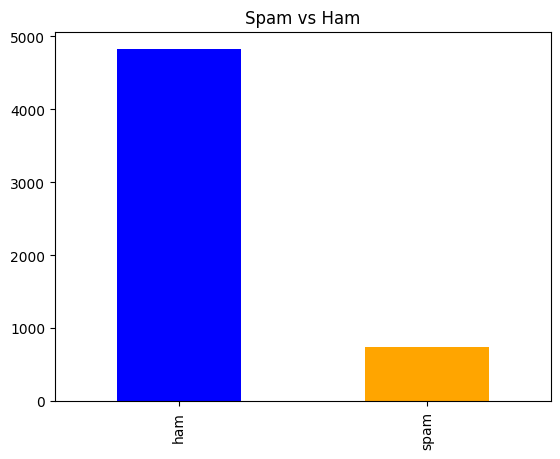

In [211]:
#Bar Chart
count=pd.value_counts(myData["Category"], sort= True)
count.plot(kind='bar', color= ["blue", "orange"])
plt.title('Spam vs Ham')
plt.show()

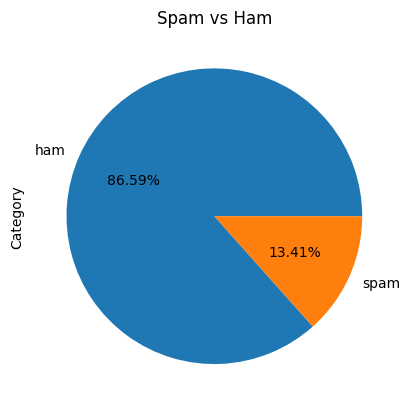

In [212]:
#Pie Chart
count=pd.value_counts(myData["Category"], sort= True)
count.plot(kind='pie', autopct='%0.2f%%')
plt.title('Spam vs Ham')
plt.show()

#Divide Data into Train and Test

In [213]:
#Label Encoding so that spam is 0 and ham is 1
myData.loc[myData['Category'] == 'spam', 'Category'] = 0
myData.loc[myData['Category'] == 'ham', 'Category'] = 1
myData

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [214]:
X = myData['Category']
y = myData['Message']

In [215]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [216]:
#Printing shape to see if the ration 80:20
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [217]:
#Changing y message to a feature vector so that it acts as an inut for the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

y_train_features = feature_extraction.fit_transform(y_train)
y_test_features = feature_extraction.transform(y_test)

# convert X_train and X_test values as integers
X_train = X_train.astype('int')
X_test = X_test.astype('int')

print(y_train_features.shape)

(4457, 7500)


#Building the Logistic Regression Model

In [218]:
model = LogisticRegression()

In [219]:
model.fit(y_train_features, X_train) #Training

LogisticRegression()

In [220]:
print(f'Train Accuracy: {model.score(y_train_features, X_train):.3f}')
print(f'Test Accuracy: {model.score(y_test_features, X_test):.3f}')

Train Accuracy: 0.968
Test Accuracy: 0.970


In [221]:
from sklearn.metrics import classification_report
print(classification_report(X_test, model.predict(y_test_features), zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#Predictive System

In [222]:
#Predicts whether the mail is spam or ham
input_mail1 = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]
input_mail2 = ["Oh k...i'm watching here:)"]
# convert text to feature vectors
input_data_features1 = feature_extraction.transform(input_mail1)
input_data_features2 = feature_extraction.transform(input_mail2)

# making prediction
prediction1 = model.predict(input_data_features1)
prediction2 = model.predict(input_data_features2)
print(prediction1)
print(prediction2)

if (prediction1==1):
  print('Ham mail')
else:
  print('Spam mail')
if (prediction2==1):
  print('Ham mail')
else:
  print('Spam mail')

[0]
[1]
Spam mail
Ham mail
